In [2]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns


path='result.txt'
result_df = pd.read_csv(path, sep=' - ', header=None, engine='python')
result_df.columns = ['core', 'path', 'size', 'elapsed_time']
result_df=result_df.drop(columns='path')

result_df['core'] = result_df['core'].str.replace('Core: ', '').str.replace('*','17').astype('int')
result_df['size'] = result_df['size'].str.replace('Size: ', '').str.replace(' MB', '').astype('float')
result_df['elapsed_time'] = result_df['elapsed_time'].str.replace('Elapsed time:','').str.replace(' sec', '').astype('float')
cores = result_df['core'].unique()
datasize = result_df['size'].unique()
elapsed_time = result_df['elapsed_time'].values.reshape(set(datasize).__len__(),-1)

# log_datasize
ldatasize = np.log(datasize) 
ylabel = 'log(datasize)' 

# log_elapsedtime
lelapsed_time = np.log(elapsed_time) 
zlabel = 'log(elapsed time(sec))' 

def plot_3dsurface(x,y,z, params):
    fig = plt.figure(figsize=(13,13))
    ax = plt.axes(projection='3d')
    ax.set_xlabel(params['xlabel'])
    ax.set_ylabel(params['ylabel'])
    ax.set_zlabel(params['zlabel']);
    ax.set_title(params['title']);

    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    return plt

def plot_2dsurface(x,y, params):
    plt.figure(figsize=(12,7))
    plt.plot(x,np.transpose(y),'r',linewidth=6.0,)
    plt.xlabel(params['xlabel'])
    plt.ylabel(params['ylabel'])
    plt.title(params['title' ]);
    plt.grid(True) 
    return plt




def coredata (a):
    index=0
    times=[]
    sizes=[]
    for i in result_df['core']:
        if i%a == 0: 
            times.append (result_df['elapsed_time'][index])
            sizes.append (result_df['size'][index])
        index=index+1
    return sizes,times


def speedup(x,speed):
    for a in range (0,8):
        speed.append(result_df['elapsed_time'][x*8+7]/result_df['elapsed_time'][x*8+a])
    return speed
        

print("Correlation between elapse time and core  :", result_df['elapsed_time'].corr(result_df['core']))
print("Correlation between elapse time and size :", result_df['elapsed_time'].corr(result_df['size']))


Correlation between elapse time and core  : -0.2600616280377557
Correlation between elapse time and size : 0.7715319822194693


In [ ]:
plt.plot(ldatasize,lelapsed_time)

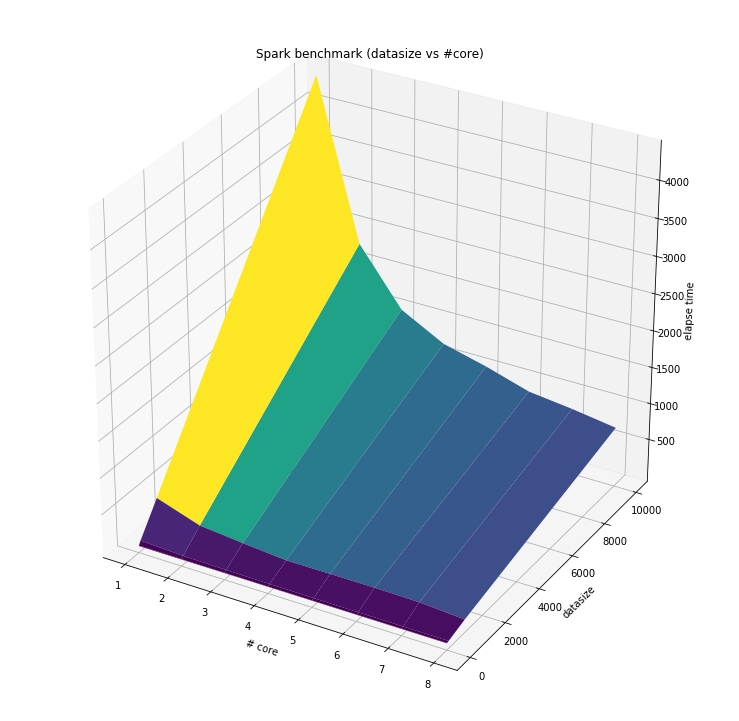

In [7]:

plot_3dsurface(x=cores, y=datasize, z=elapsed_time,
               params={'xlabel':'# core',
                       'ylabel':'datasize',
                       'zlabel':'elapse time',
                       'title':'Spark benchmark (datasize vs #core)'}).savefig('spark benchmark (datasize vs #core)')

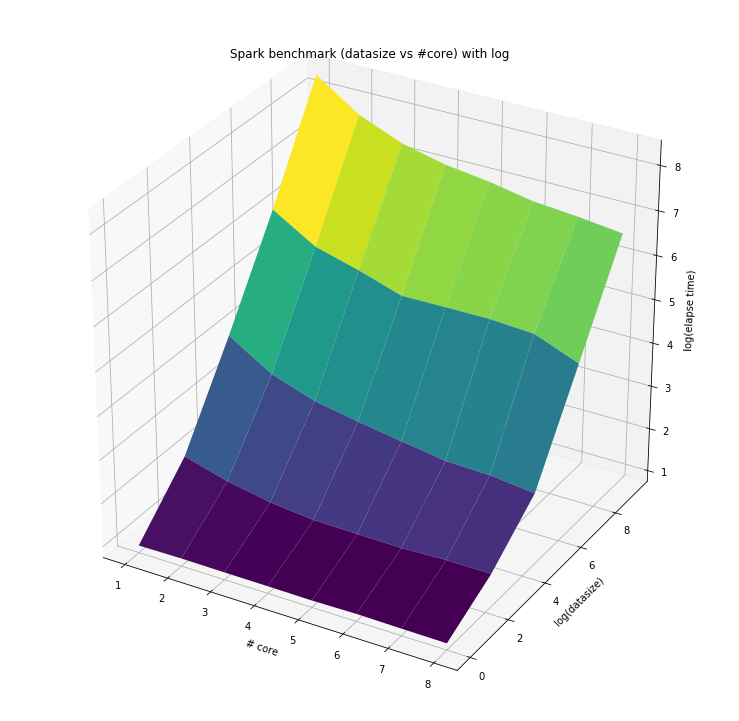

In [8]:

plot_3dsurface(x=cores, y=ldatasize, z=lelapsed_time,
               params={'xlabel':'# core',
                       'ylabel':'log(datasize)',
                       'zlabel':'log(elapse time)',
                       'title':'Spark benchmark (datasize vs #core) with log'}).savefig('spark benchmark (datasize vs #core) with log')

# speed-core benchmark for given data

## 1 Mb

In [ ]:

plot_2dsurface(cores,np.transpose(elapsed_time[0]),
               params={'title':'spark benchmark (datasize=1 Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()
plot_2dsurface(cores,np.transpose(lelapsed_time[0]),
               params={'title':'spark benchmark (datasize=1 Mb vs #cores) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).show()


## 10 Mb

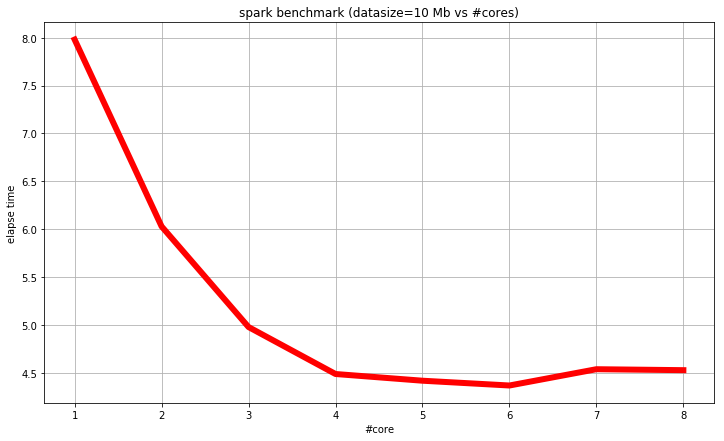

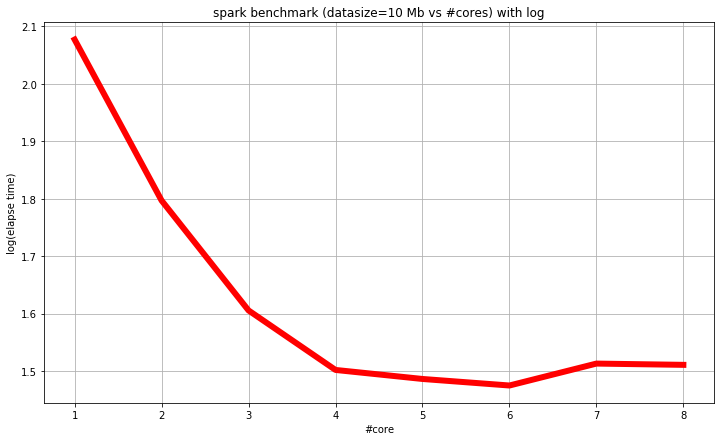

In [3]:

plot_2dsurface(cores,np.transpose(elapsed_time[1]),
               params={'title':'spark benchmark (datasize=10 Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()
plot_2dsurface(cores,np.transpose(lelapsed_time[1]),
               params={'title':'spark benchmark (datasize=10 Mb vs #cores) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).show()

## 100 Mb

In [ ]:

plot_2dsurface(cores,np.transpose(elapsed_time[2]),
               params={'title':'spark benchmark (datasize=100 Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()
plot_2dsurface(cores,np.transpose(lelapsed_time[2]),
               params={'title':'spark benchmark (datasize=100 Mb vs #cores) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).show()

## 1k Mb

In [ ]:
plot_2dsurface(cores,np.transpose(elapsed_time[3]),
               params={'title':'spark benchmark (datasize=1k Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()
plot_2dsurface(cores,np.transpose(lelapsed_time[3]),
               params={'title':'spark benchmark (datasize=1k Mb vs #cores) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).show()

# 10k Mb

In [ ]:
plot_2dsurface(cores,np.transpose(elapsed_time[4]),
               params={'title':'spark benchmark (datasize=10k Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()

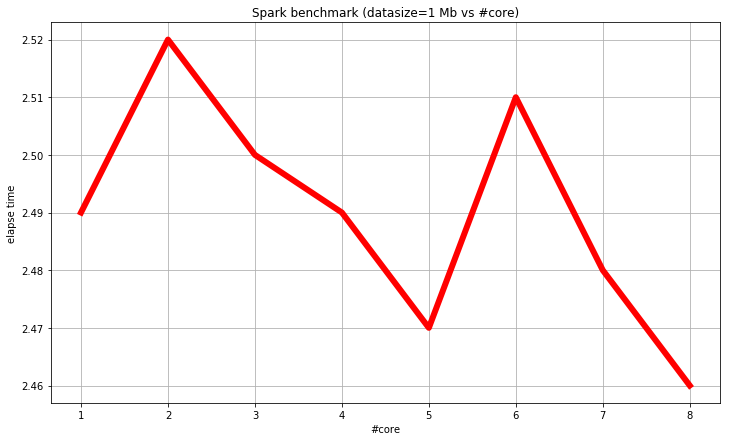

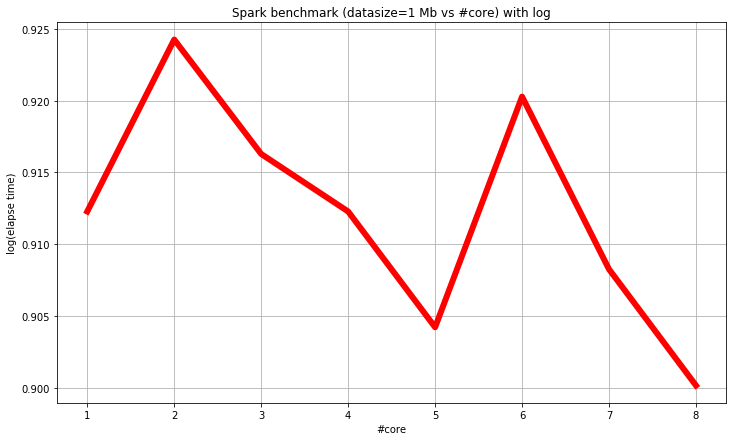

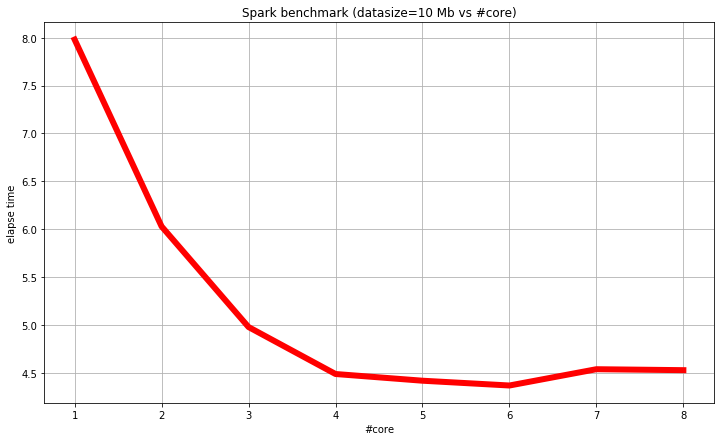

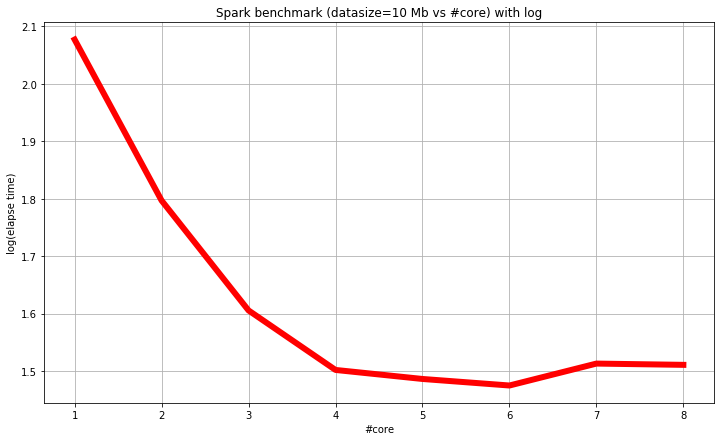

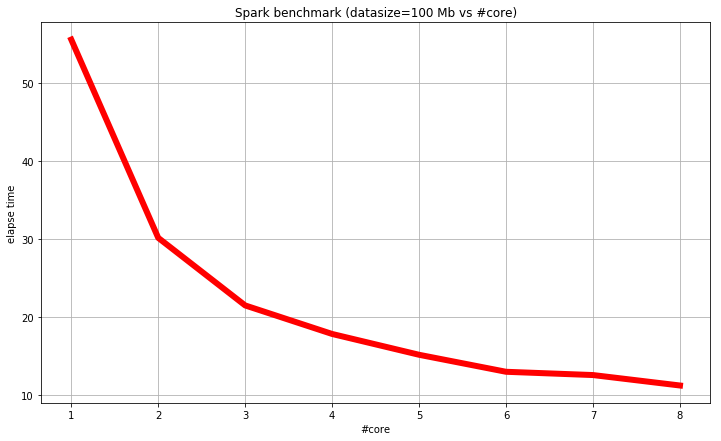

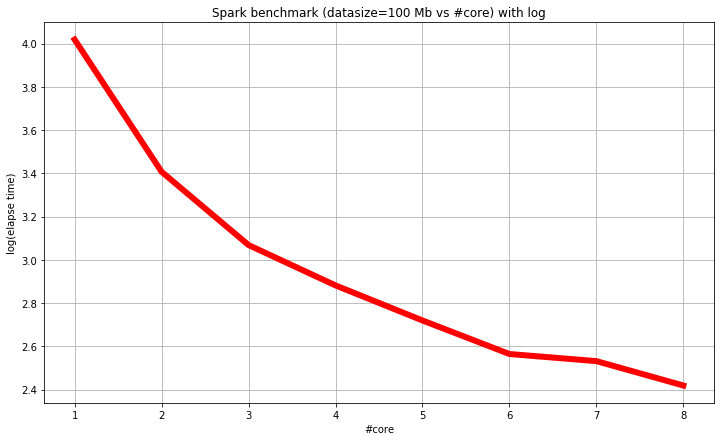

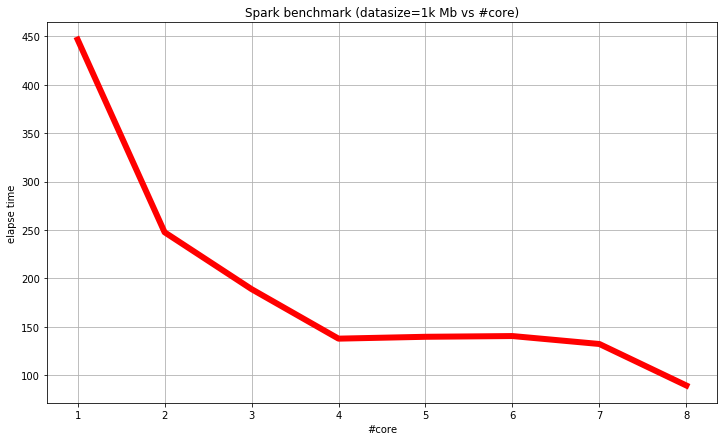

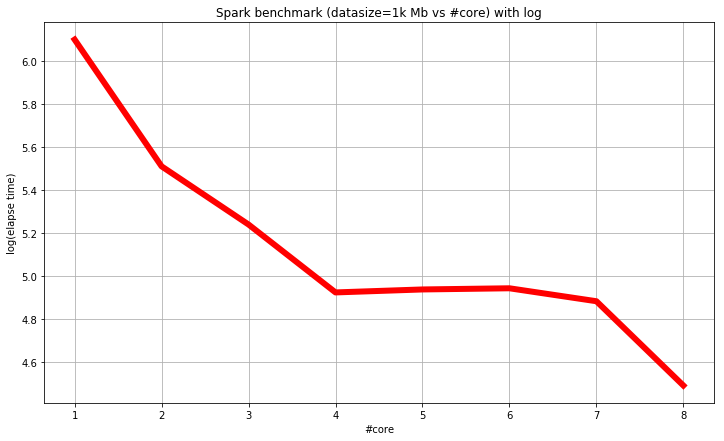

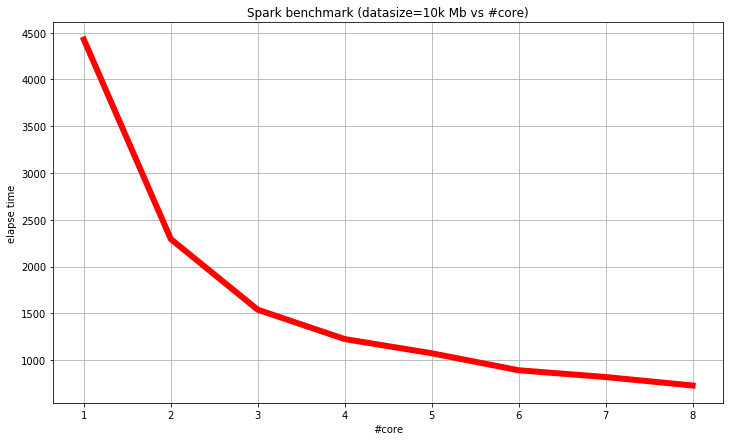

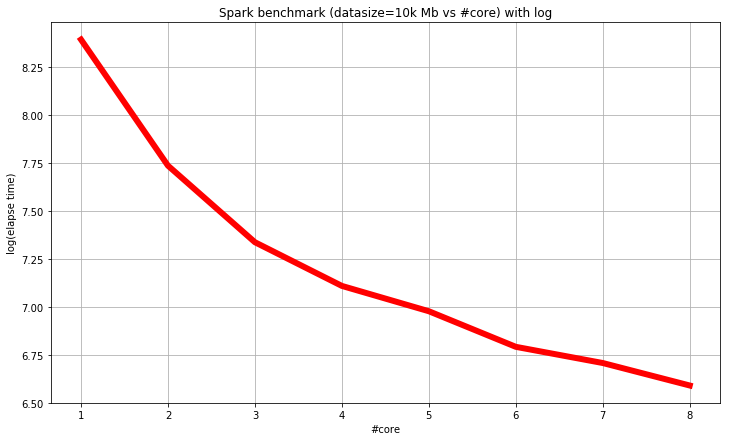

In [49]:
x=['1','10','100','1k','10k']
for a in range (0,5):
    plot_2dsurface(cores,np.transpose(elapsed_time[a]),
               params={'title':f'Spark benchmark (datasize={x[a]} Mb vs #core)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).savefig(f'Spark benchmark (datasize={x[a]} Mb vs #core')
    plot_2dsurface(cores,np.transpose(lelapsed_time[a]),
               params={'title':f'Spark benchmark (datasize={x[a]} Mb vs #core) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).savefig(f'Spark benchmark (datasize={x[a]} Mb vs #core with log')

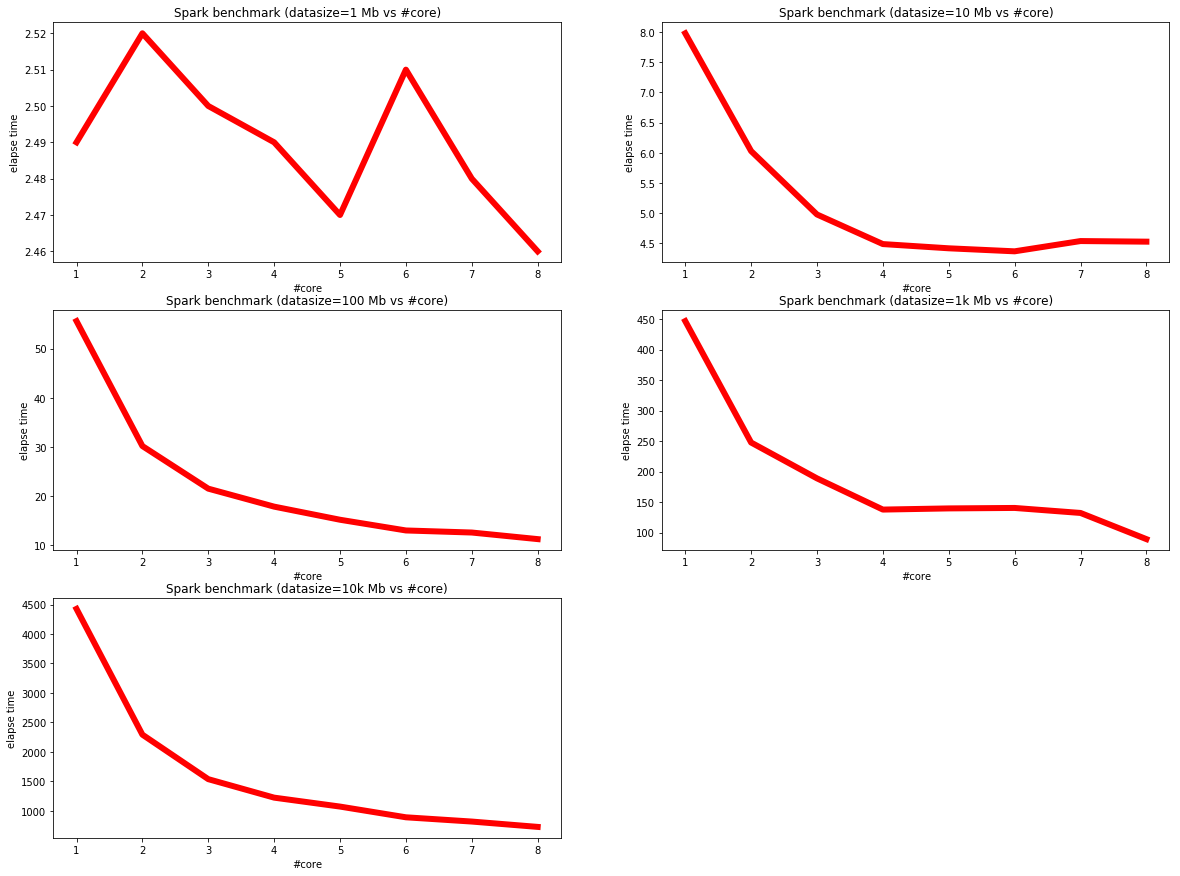

In [79]:
plt.figure(figsize=(20,15))


x=['1','10','100','1k','10k']
for a in range (0,5):
    plt.subplot(3,2,a+1)
    plt.title(f'Spark benchmark (datasize={x[a]} Mb vs #core)')
    plt.xlabel('#core')
    plt.ylabel('elapse time')
    plt.plot(cores,np.transpose(elapsed_time[a]),'r',linewidth=6.0)
plt.savefig('Spark benchmark (datasize vs #core')   
             

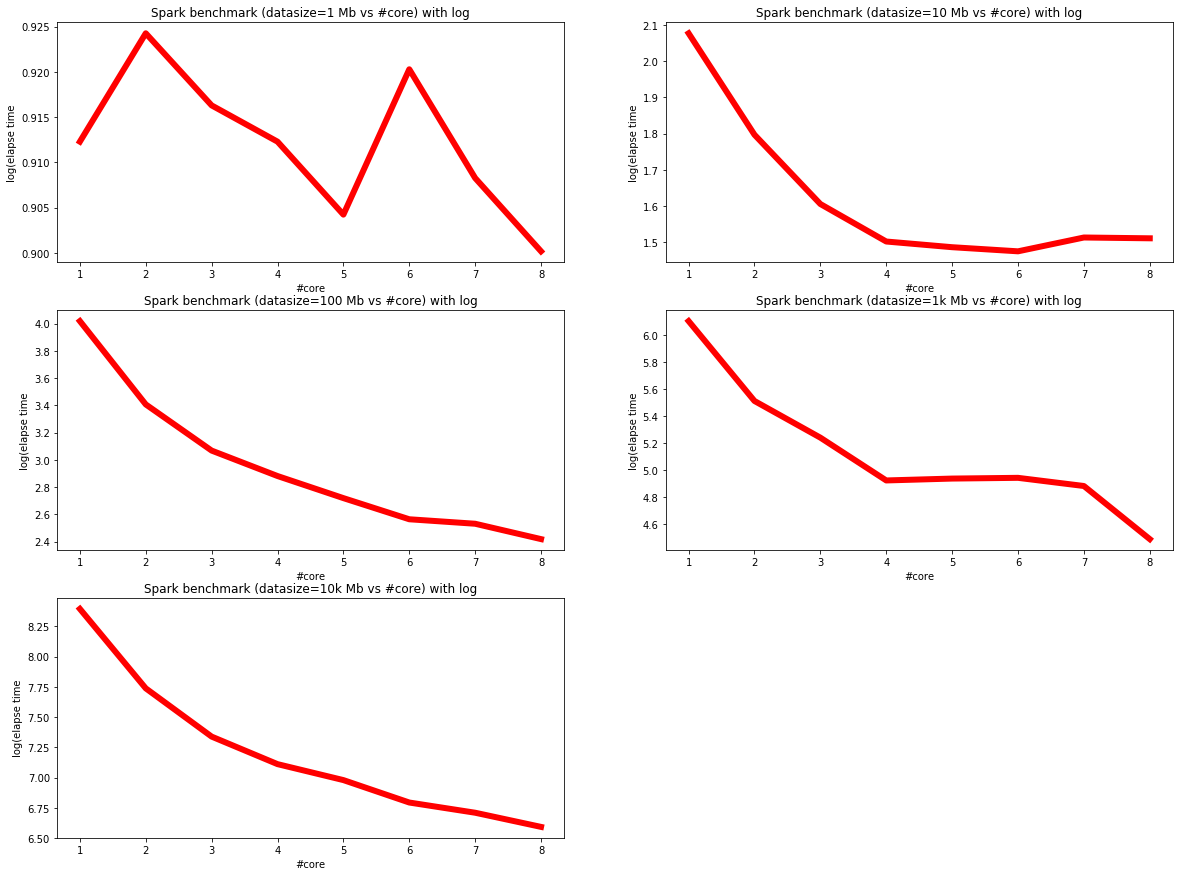

In [78]:
plt.figure(figsize=(20,15))


x=['1','10','100','1k','10k']
for a in range (0,5):
    plt.subplot(3,2,a+1)
    plt.title(f'Spark benchmark (datasize={x[a]} Mb vs #core) with log')
    plt.xlabel('#core')
    plt.ylabel('log(elapse time')
    plt.plot(cores,np.transpose(lelapsed_time[a]),'r',linewidth=6.0)
plt.savefig('Spark benchmark (datasize vs #core) with log' )   


# speed-data benchmark for given core

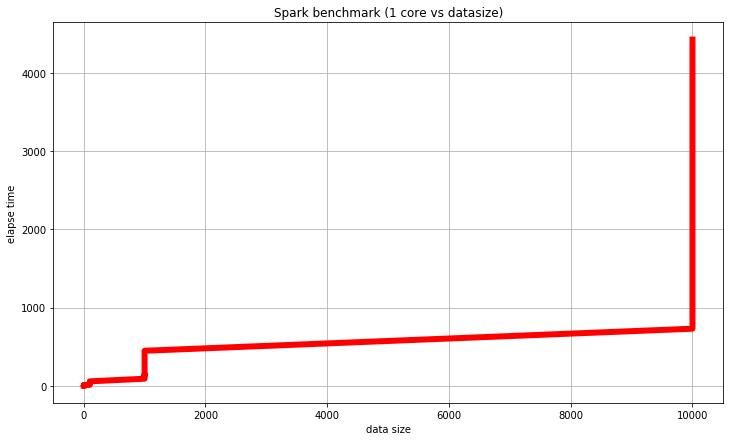

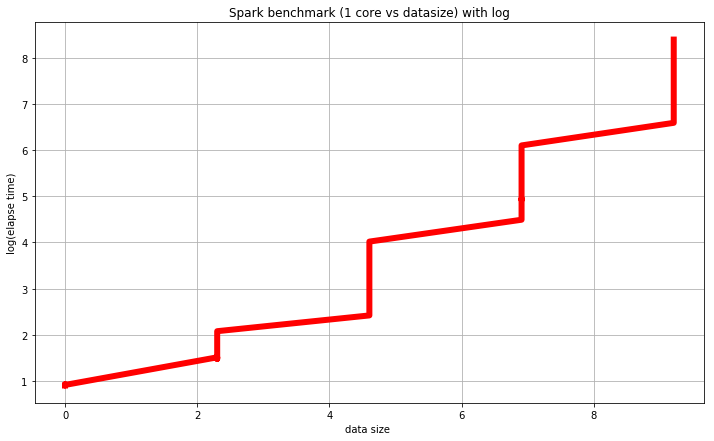

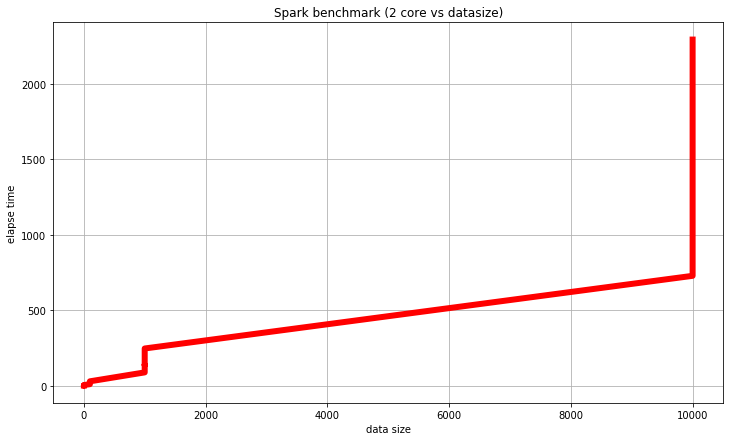

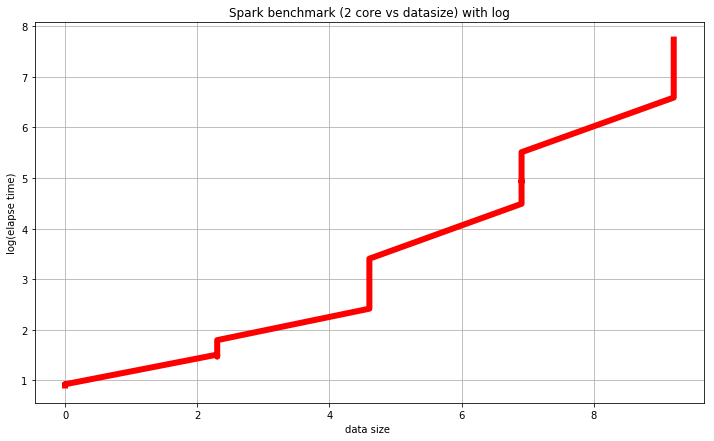

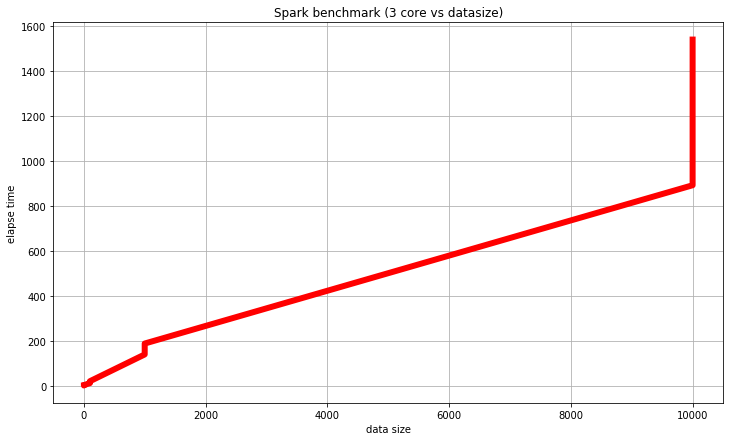

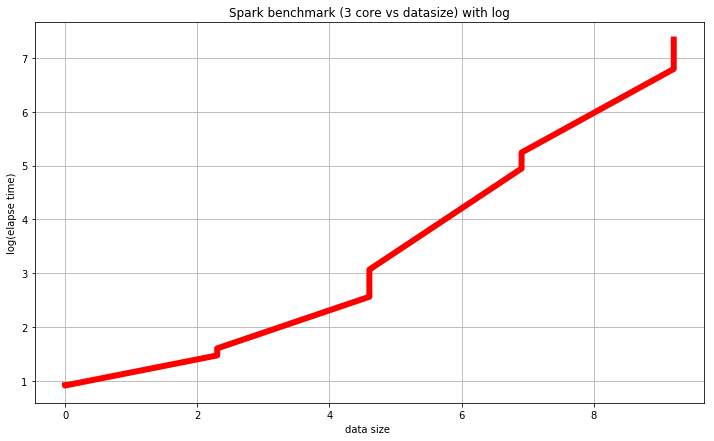

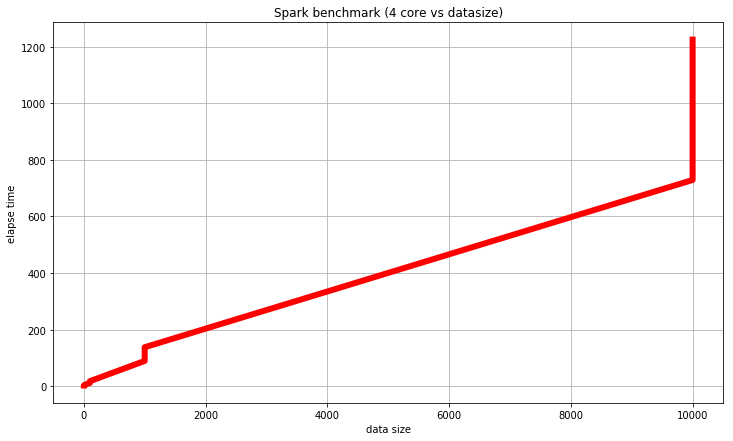

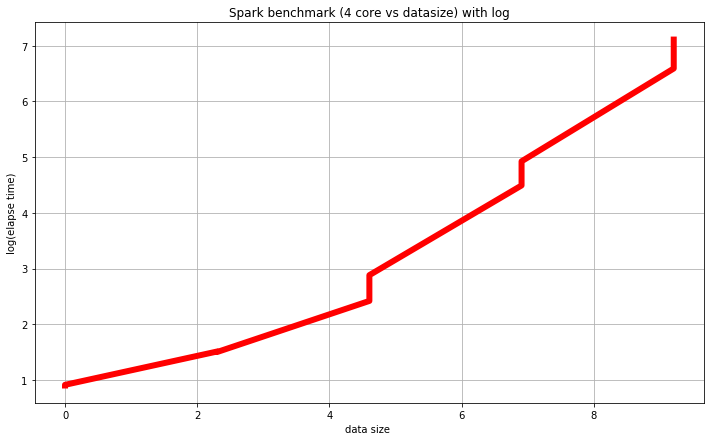

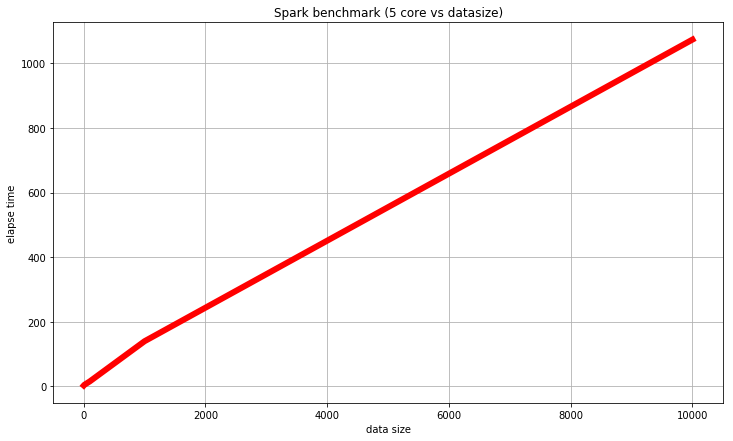

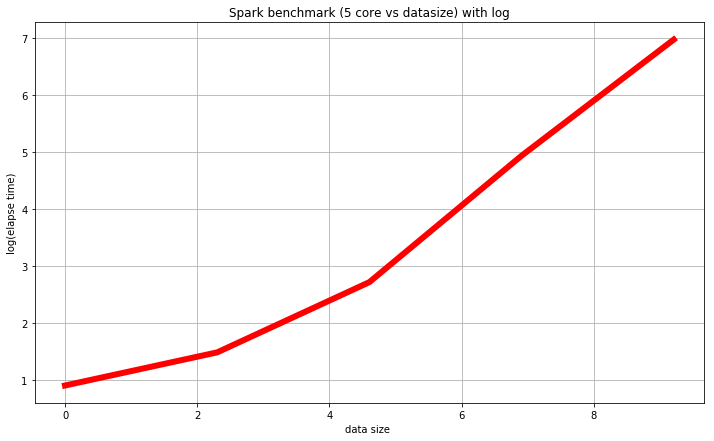

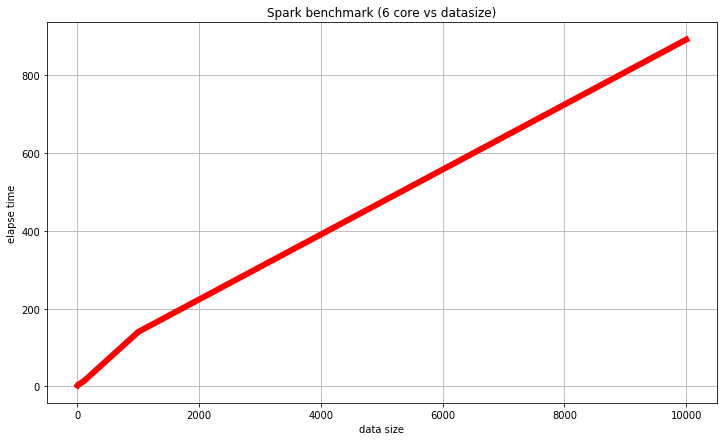

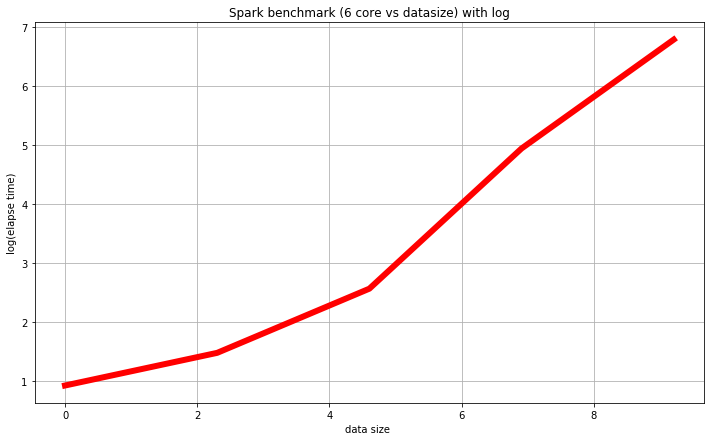

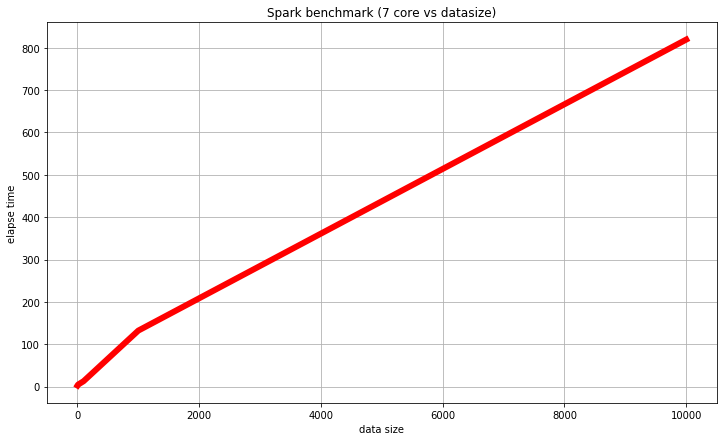

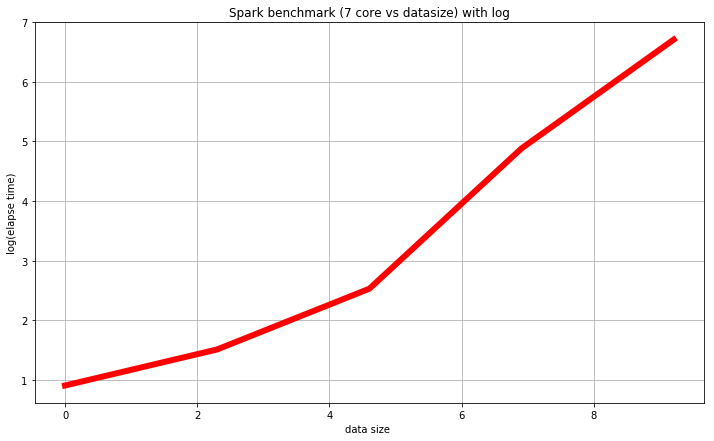

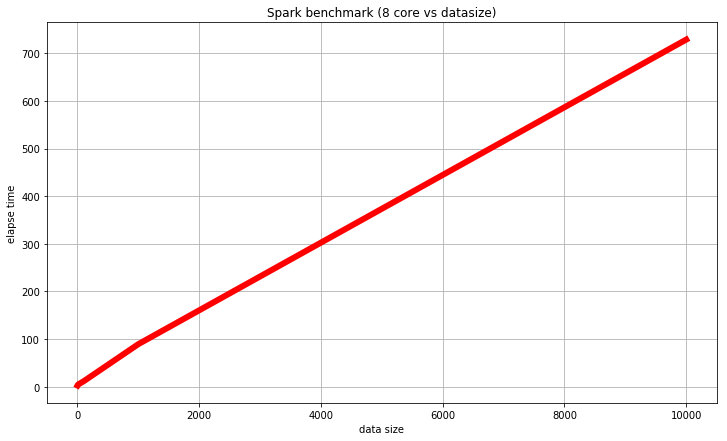

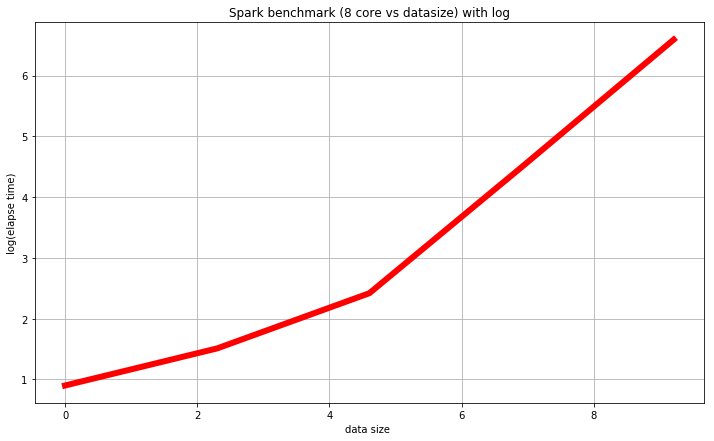

In [47]:
for a in range (1,9):
    x,y=coredata(a)
    plot_2dsurface(x,y,
               params={'title':f'Spark benchmark ({a} core vs datasize)',
                       'xlabel':'data size',
                       'ylabel':'elapse time'}).show()
    
    
    plot_2dsurface(np.log(x),np.log(y),
               params={'title': f'Spark benchmark ({a} core vs datasize) with log',
                       'xlabel':'data size ',
                       'ylabel':'log(elapse time)'}).show()

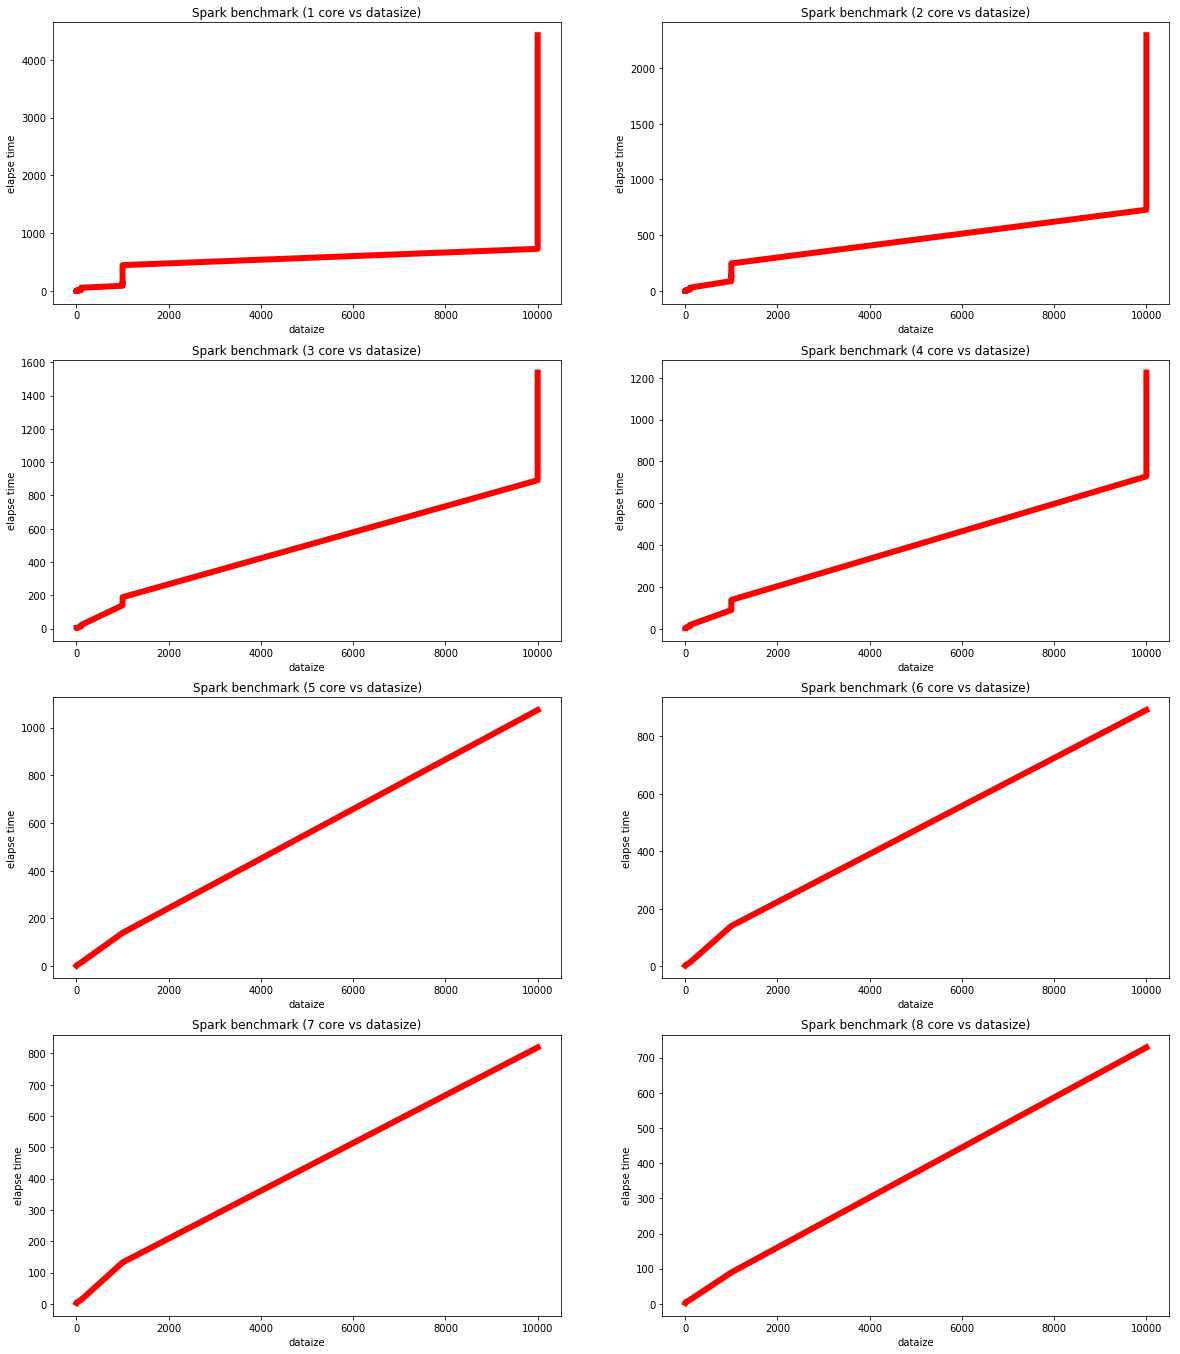

In [14]:
plt.figure(figsize=(20,30))
for a in range (1,9):
    plt.subplot(5,2,a)
    x,y=coredata(a)

    plt.title(f'Spark benchmark ({a} core vs datasize)')
    plt.xlabel('dataize')
    plt.ylabel('elapse time')
    plt.plot(x,y,'r',linewidth=6.0)
plt.savefig('Spark benchmark (#datasize vs core')   


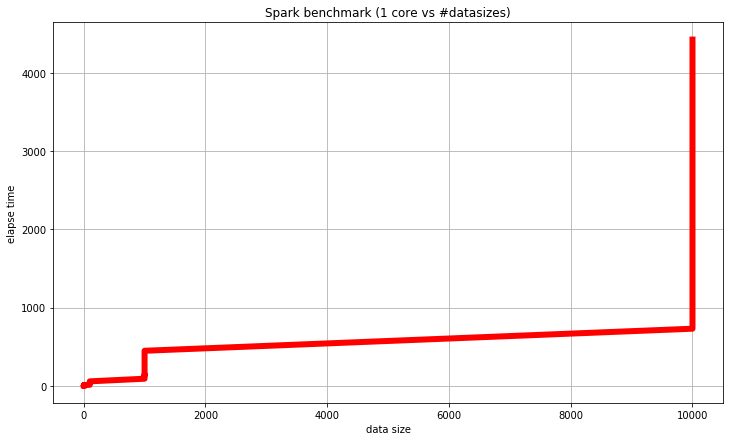

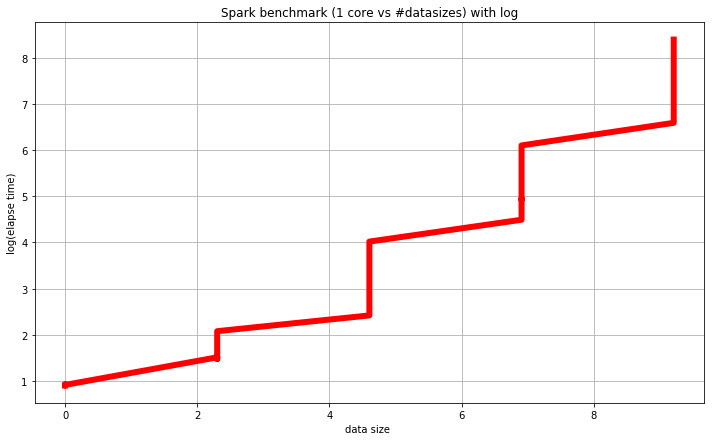

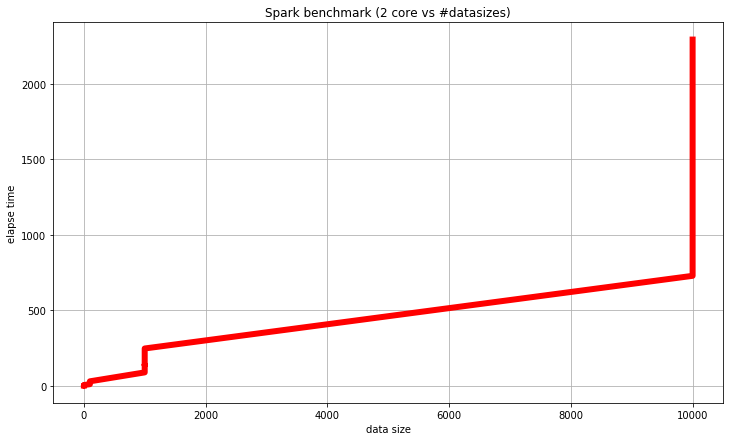

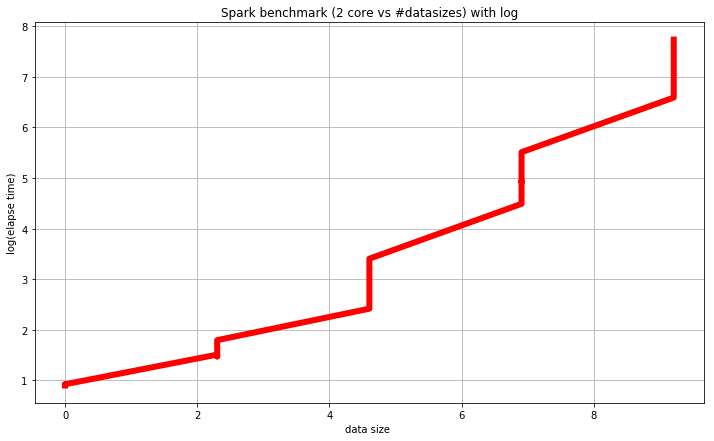

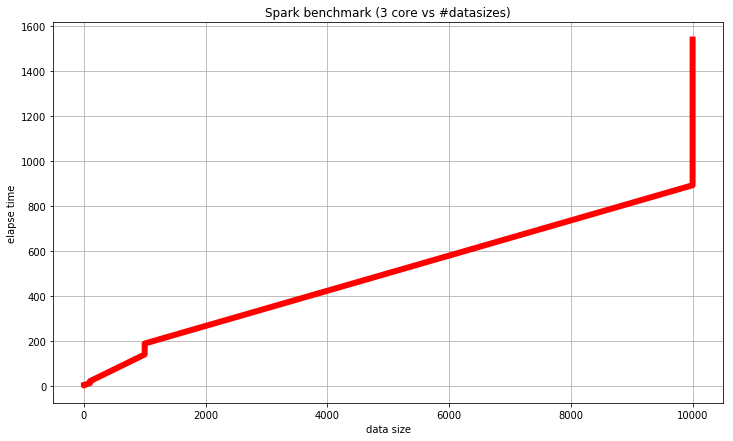

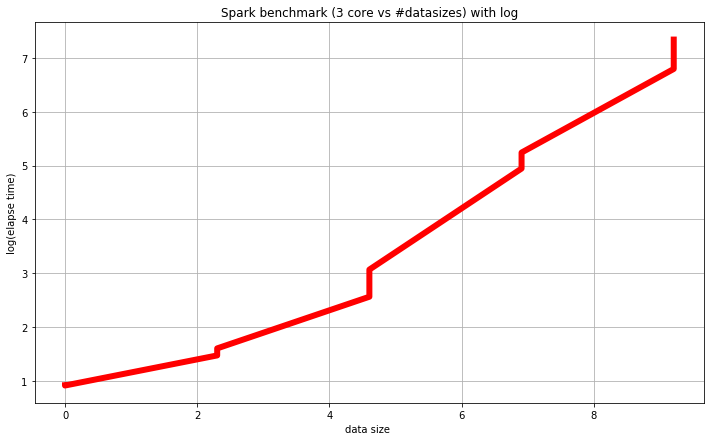

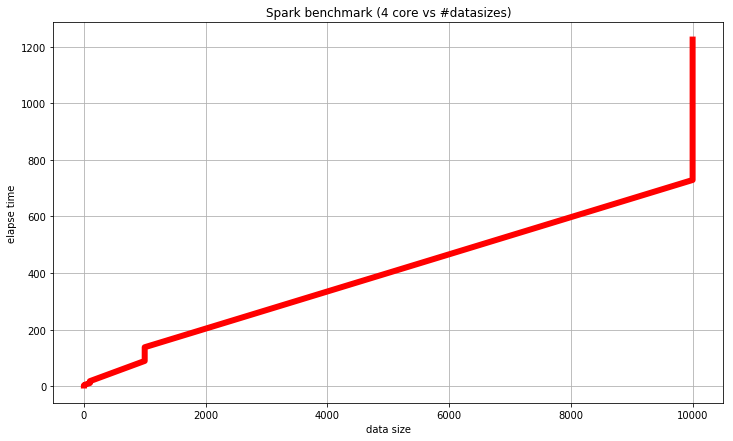

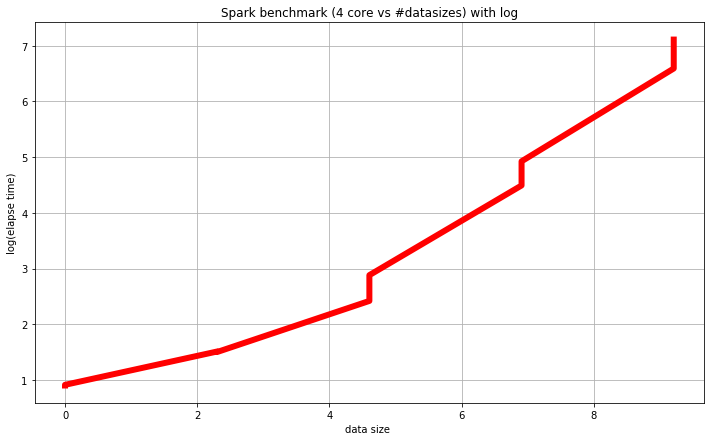

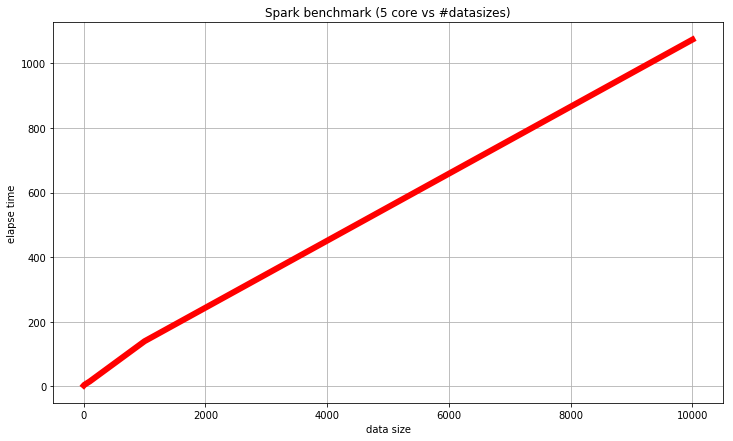

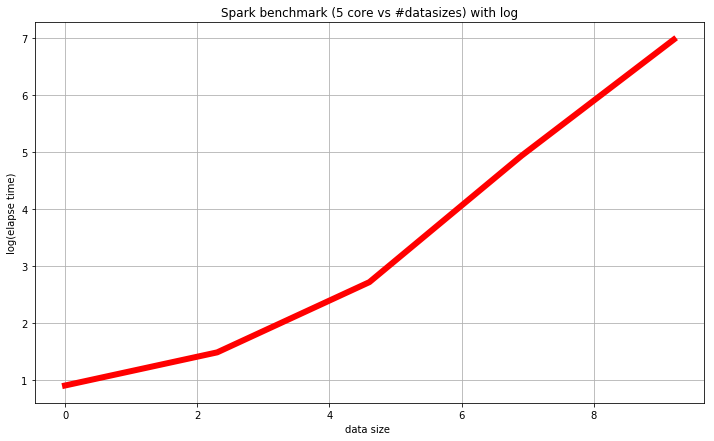

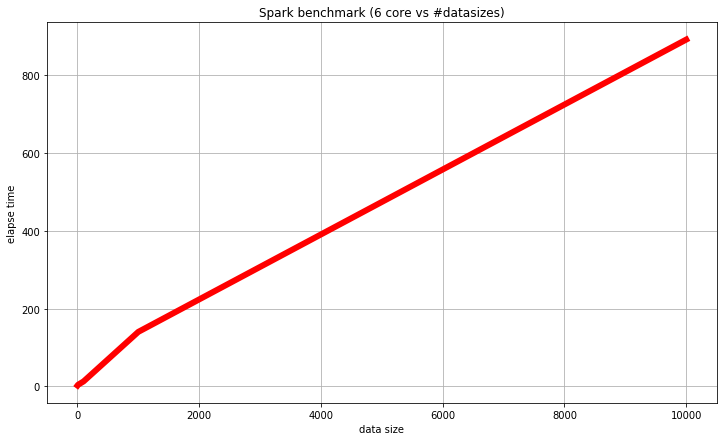

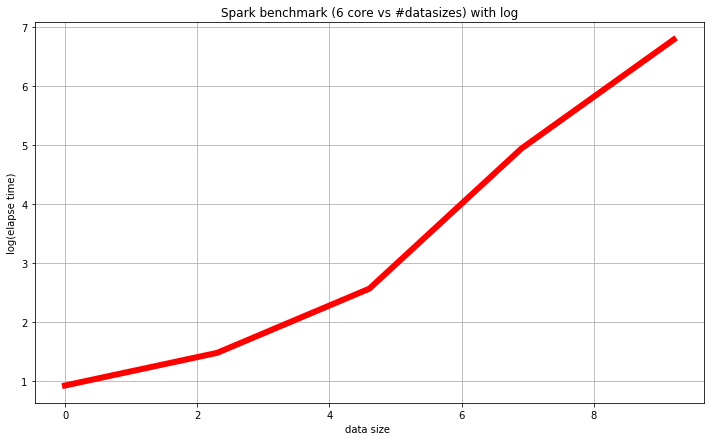

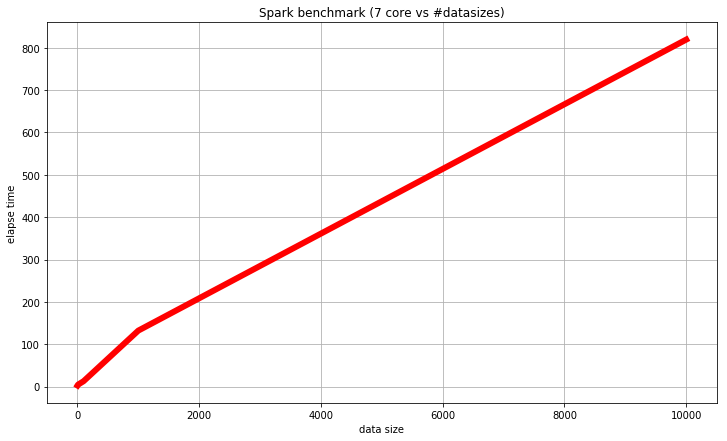

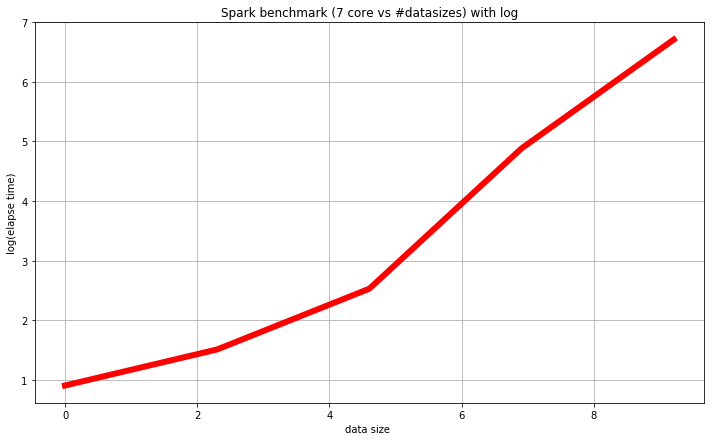

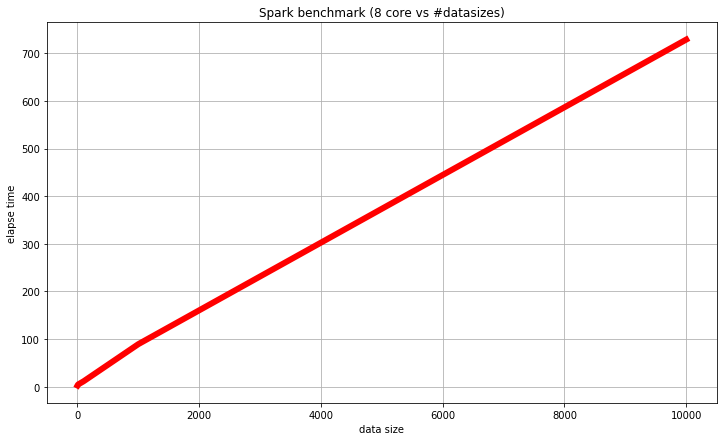

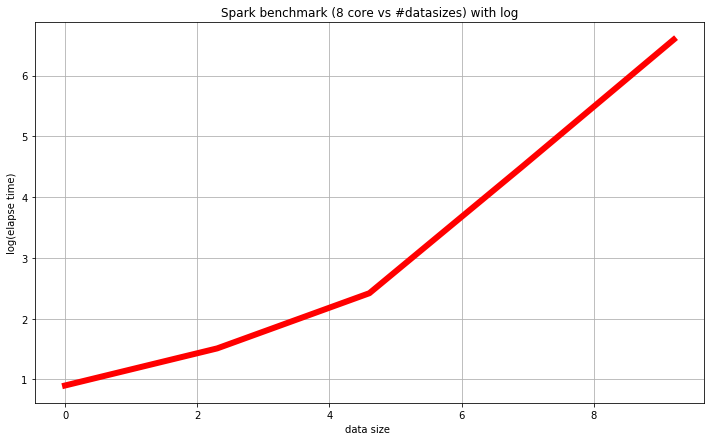

In [6]:
for a in range (1,9):
    x,y=coredata(a)
    plot_2dsurface(x,y,
               params={'title':f'Spark benchmark ({a} core vs #datasizes)',
                       'xlabel':'data size',
                       'ylabel':'elapse time'}).savefig(f'Spark benchmark ({a} core vs datasize')
    plot_2dsurface(np.log(x),np.log(y),
               params={'title': f'Spark benchmark ({a} core vs #datasizes) with log',
                       'xlabel':'data size ',
                       'ylabel':'log(elapse time)'}).savefig(f'Spark benchmark ({a} core vs datasize with log')

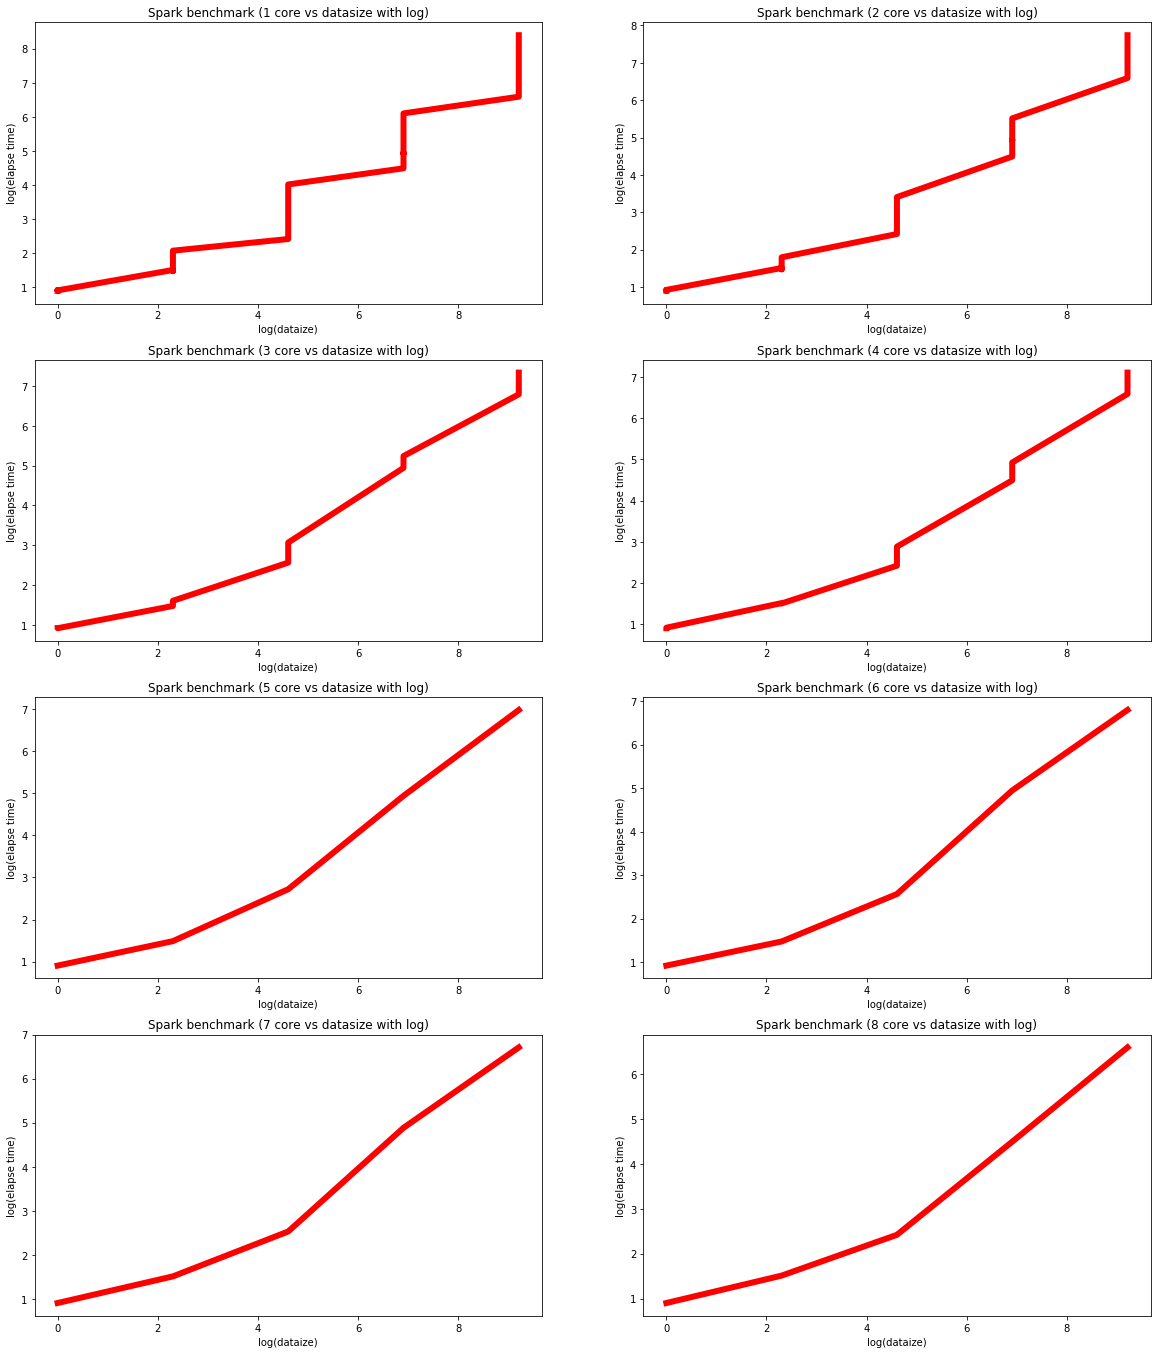

In [16]:
plt.figure(figsize=(20,30))
for a in range (1,9):
    plt.subplot(5,2,a)
    x,y=coredata(a)

    plt.title(f'Spark benchmark ({a} core vs datasize with log)')
    plt.xlabel('log(dataize)')
    plt.ylabel('log(elapse time)')
    plt.plot(np.log(x),np.log(y),'r',linewidth=6.0)
plt.savefig('Spark benchmark (#datasize vs core) with log')   


# #speed up

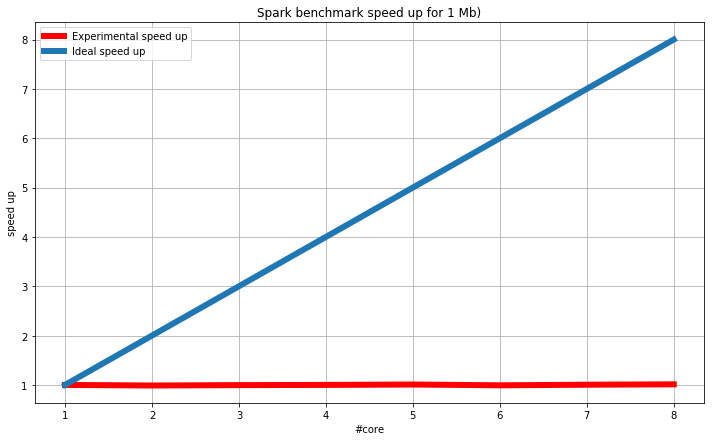

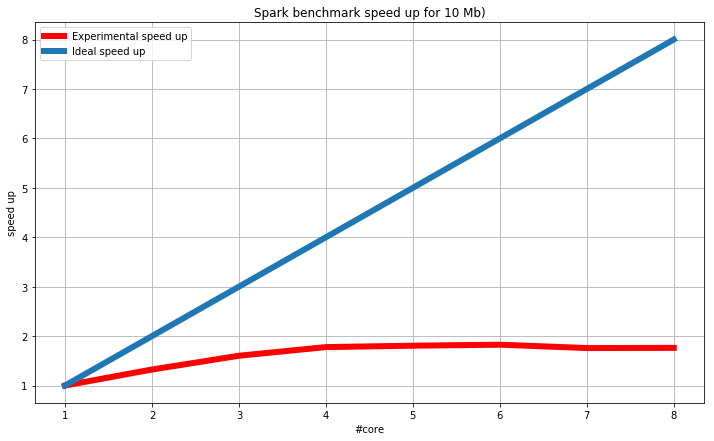

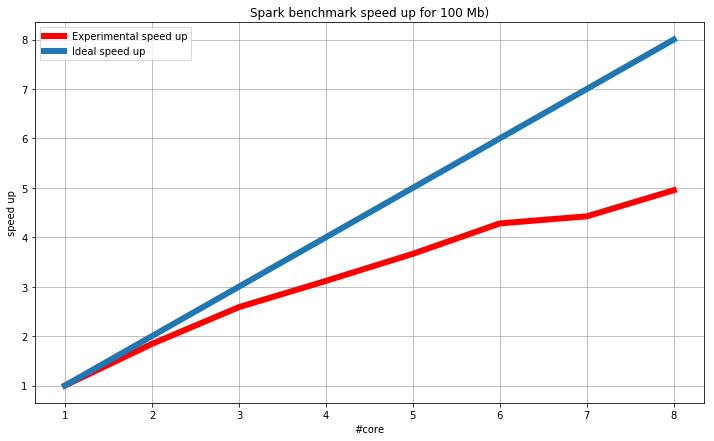

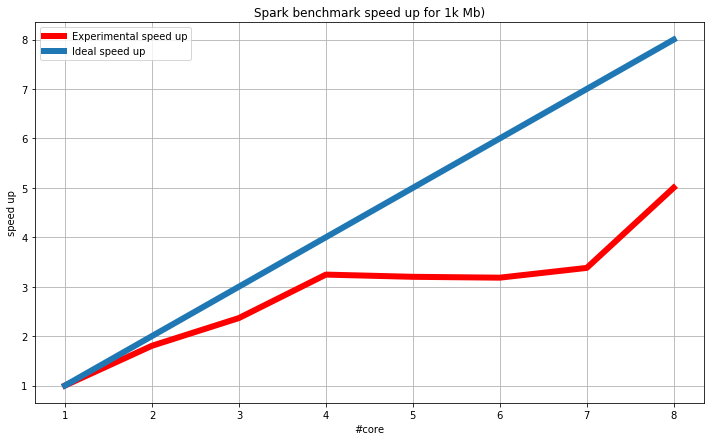

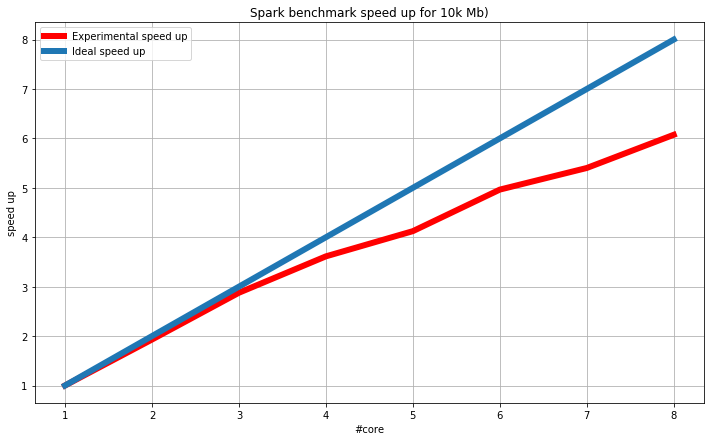

In [50]:
speed=[]
x=['1','10','100','1k','10k']
for i in range(0,5):
    speedup(i,speed)
    plot_2dsurface(cores,speed[i*8:i*8+8],
               params={'title':f'Spark benchmark speed up for {x[i]} Mb)',
                       'xlabel':'#core',
                       'ylabel':'speed up'})
    plt.plot(cores,cores,linewidth=6.0)
    plt.legend(["Experimental speed up","Ideal speed up"])
    plt.savefig(f'Spark benchmark speed up for {x[i]} Mb')

In [48]:
cores

array([8, 7, 6, 5, 4, 3, 2, 1])

In [51]:

result_df


,core,size,elapsed_time
0,8,1.00,2.46
1,7,1.00,2.48
2,6,1.00,2.51
3,5,1.00,2.47
4,4,1.00,2.49
5,3,1.00,2.50
6,2,1.00,2.52
7,1,1.00,2.49
8,8,10.00,4.53
9,7,10.00,4.54
